# 소셜 네트워크 분석

## 1. 비즈니스 이해

### Background: 어떠한 문제가 존재하는지 상황에 대해 알려진 기사, 논문, 보고서 등을 인용하여 현상을 구체적으로 기술하시기 바랍니다.
- [[열려라 공부] 새 친구 '탐색 시기' 학교폭력도 늘어요](http://news.joins.com/article/21292322)
- 새 학년이 시작되는 3월엔 새로 만난 학생 사이의 갈등도 생기기 마련이다. 송형호 서울 천호중 교사(전 서울시교육청학교폭력담당 파견교사)는 이를 두고 ‘3주의 징크스’라고 불렀다. 개학 직후 1~2주를 지나 3주차가 되면 크고 작은 학교폭력이 시작된다는 설명이다.

### Business Objectives: 기업(혹은 본인)에게 이 현상이 어떠한 이유로 분석을 해야 하는지 추상적(함축적)으로 기술하시기 바랍니다.
- 교우관계 진단을 통해 “따돌림 위기군”을 사전에 파악하고, 학교 내 청소년 교우관계 문제를 해소하는데 도움이 되고자 함.

### Business Success Criteria: 비즈니스 관점에서 분석결과의 성공기준(정량적) 또는 유용한 결과에 대한 기준(정성적)을 설명하십시오.
- 교사 입장에서 교우관계 진단을 통해, 집중적으로 관리해야할 학생군을 파악하고, 학기 초와 비교하여 학기 말에 1명(왕따) 혹은 2명의 학생 네트워크 수를 줄인다.

### Analysis Goals: 비즈니스 목표에 대한 의사결정 지원을 위해 실시하는 분석의 목표를 기술합니다. 
- 학생 네트워크 수의 변화 양상 분석, 소수 학생(1명 혹은 2명간) 네트워크 파악
- ![외톨이 유형](외톨이.jpg)
- 참조문헌(http://cyram.tistory.com/213)

## 2. 데이터의 이해
- 학기초 학생에 대한 설문조사를 실시하여 데이터를 수집함.
- [구글 설문조사 활용](https://goo.gl/forms/QSPhpQmOpWwxT1gS2)
    - 구글 설문: 학기 초 1회 실시(47명)
    - 구글 설문: 학기 중간 1회 실시(47명)
- 데이터 전처리 : 2개 entity를 결합 / 집계


## 3. 데이터 준비

In [2]:
# 네트워크 분석을 지원하는 networkx, pydot 모듈을 설치해야 함.
# conda install -c anaconda networkx
# pip install pydot
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

C:\Users\HYU\Miniconda3\lib\site-packages\matplotlib\backends\__init__.py:89: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  (name, backend_version))
C:\Users\HYU\Miniconda3\lib\site-packages\matplotlib\__init__.py:356: MatplotlibDeprecationWarning: matplotlib.verbose is deprecated;
Command line argument --verbose-LEVEL is deprecated.
This functionality is now provided by the standard
python logging library.  To get more (or less) logging output:
    import logging
    logger = logging.getLogger('matplotlib')
    logger.set_level(logging.INFO)
  @cbook.deprecated("2.1")


#### 네트워크 그래프 클래스
- Graph: 이 클래스는 무방향 그래프를 구현합니다. 두 노드 사이의 여러 엣지를 무시합니다. 노드와 노드 사이에 자체 루프 에지를 허용합니다.
- DiGraph: 방향성 그래프, 즉 방향성 엣지를 가진 그래프. 유향 그래프(Graph의 서브 클래스)에 공통의 조작을 제공합니다.
- MultiGraph: 노드 쌍 사이에 여러 무방향 에지를 허용하는 유연한 그래프 클래스입니다. 추가 유연성은 일반적으로 중요하지 않지만 성능 저하를 가져옵니다.
- MultiDiGraph: MultiGraph의 방향성 버전.

In [3]:
# 그래프 유형 선언
G1 = nx.Graph()
G2 = nx.DiGraph()
G3 = nx.MultiGraph()
G4 = nx.MultiDiGraph()

In [4]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'D')
G.add_edge('A', 'C')
G.add_edge('C', 'D')
nx.shortest_path(G, 'A', 'D', weight='weight')

['A', 'B', 'D']

### 데이터 임포트
- 데이터 내 값: NaN은 하나의 열 단위로 존재하는데, 이는 해당 열의 인원이 출석하지 않음을 의미함. -> 제거
- 데이터 내 값: - 은 본인이 본인을 평가할 수 없기 때문에 입력된 것
- 데이터 내 값: 1 은 관계가 있음을 의미
- 데이터 내 값: 0 은 관계가 없음을 의미

In [16]:
# 구글 설문 데이터를 불러옴.
data = pd.read_excel("dreamnatework.xlsx")
data.head()

,학생 이름은 무엇입니까?,1. 이정우,2. 이혜진,3. 이수현,4. 김태영,5. 이승환,6. 정승용,7. 지서향,8. 김태균,9. 진민경,10. 정윤영,11. 오혜민,12. 유경환
0,정윤영,1,0,0,0,0,0,0,1,1,0,0,0
1,진민경,1,0,0,0,0,0,0,1,0,1,0,0
2,지서향,1,0,0,0,0,0,0,0,0,0,0,0
3,이혜진,1,0,1,0,0,0,0,0,0,0,0,0
4,이수현,1,1,0,0,0,0,0,0,0,0,0,0


In [17]:
# 설문에 참여를 참여를 안 한 열을 제거함.
data = data.dropna(axis=1) # axis =1 열을 기준으로 삭제
data.head()

,학생 이름은 무엇입니까?,1. 이정우,2. 이혜진,3. 이수현,4. 김태영,5. 이승환,6. 정승용,7. 지서향,8. 김태균,9. 진민경,10. 정윤영,11. 오혜민,12. 유경환
0,정윤영,1,0,0,0,0,0,0,1,1,0,0,0
1,진민경,1,0,0,0,0,0,0,1,0,1,0,0
2,지서향,1,0,0,0,0,0,0,0,0,0,0,0
3,이혜진,1,0,1,0,0,0,0,0,0,0,0,0
4,이수현,1,1,0,0,0,0,0,0,0,0,0,0


In [18]:
# 우리는 adjacency matrix나 edgelist가 필요함.
# 컬럼명을 변경해야함. ex) 1. 경영학부 10학번 이정우 -> 이정우
data.columns # 우선 컬럼명 조회

Index(['학생 이름은 무엇입니까?', '1. 이정우', '2. 이혜진', '3. 이수현', '4. 김태영', '5. 이승환',
       '6. 정승용', '7. 지서향', '8. 김태균', '9. 진민경', '10. 정윤영', '11. 오혜민',
       '12. 유경환'],
      dtype='object')

In [19]:
data.columns[0].split()

['학생', '이름은', '무엇입니까?']

In [20]:
# 컬럼명 정리
column_list = []
for i in data.columns:
    column_list.append(i.split()[-1]) # 공백으로 나눠서 나오는 리스트의 맨 마지막 문자열[-1]이 바로 학생이름임.
column_list[:5]

['무엇입니까?', '이정우', '이혜진', '이수현', '김태영']

In [21]:
data.columns = column_list
data.head()

,무엇입니까?,이정우,이혜진,이수현,김태영,이승환,정승용,지서향,김태균,진민경,정윤영,오혜민,유경환
0,정윤영,1,0,0,0,0,0,0,1,1,0,0,0
1,진민경,1,0,0,0,0,0,0,1,0,1,0,0
2,지서향,1,0,0,0,0,0,0,0,0,0,0,0
3,이혜진,1,0,1,0,0,0,0,0,0,0,0,0
4,이수현,1,1,0,0,0,0,0,0,0,0,0,0


In [22]:
# 엣지리스트 만들기
edgelist = []
for i in data.index:
    for j in data.columns:
        if data.loc[i,j] == 1:
            edgelist.append((i,j))
        else:
            pass
edgelist

[(0, '이정우'),
 (0, '김태균'),
 (0, '진민경'),
 (1, '이정우'),
 (1, '김태균'),
 (1, '정윤영'),
 (2, '이정우'),
 (3, '이정우'),
 (3, '이수현'),
 (4, '이정우'),
 (4, '이혜진'),
 (5, '이정우'),
 (5, '정윤영'),
 (6, '이정우'),
 (7, '이정우'),
 (8, '이정우'),
 (8, '오혜민'),
 (9, '이정우'),
 (10, '이혜진'),
 (10, '이수현'),
 (10, '김태영'),
 (10, '이승환'),
 (10, '정승용'),
 (10, '지서향'),
 (10, '김태균'),
 (10, '진민경'),
 (10, '정윤영'),
 (10, '오혜민'),
 (10, '유경환'),
 (11, '이정우')]

In [23]:
len(edgelist) # 관계의 수를 확인

30

In [24]:
# 방향성 그래프를 만들고, 우리가 만든 관계 리스트(edgelist)를 입력시킨다.
G = nx.DiGraph()
G.add_edges_from(edgelist)

In [25]:
# node 확인
G.node

NodeView((0, '이정우', '김태균', '진민경', 1, '정윤영', 2, 3, '이수현', 4, '이혜진', 5, 6, 7, 8, '오혜민', 9, 10, '김태영', '이승환', '정승용', '지서향', '유경환', 11))

In [26]:
# edge 확인
G.edges

OutEdgeView([(0, '이정우'), (0, '김태균'), (0, '진민경'), (1, '이정우'), (1, '김태균'), (1, '정윤영'), (2, '이정우'), (3, '이정우'), (3, '이수현'), (4, '이정우'), (4, '이혜진'), (5, '이정우'), (5, '정윤영'), (6, '이정우'), (7, '이정우'), (8, '이정우'), (8, '오혜민'), (9, '이정우'), (10, '이혜진'), (10, '이수현'), (10, '김태영'), (10, '이승환'), (10, '정승용'), (10, '지서향'), (10, '김태균'), (10, '진민경'), (10, '정윤영'), (10, '오혜민'), (10, '유경환'), (11, '이정우')])

### 그래프 그려보기
![색깔조합](named_colors.png)
- [색상참조](https://matplotlib.org/2.0.2/examples/color/named_colors.html)
- [파라미터 참조](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)

- nx.draw(G) : 기본 그리기
- nx.draw_circular(G) : 원 위에 노드 놓기
- nx.draw_graphviz(G) : Graphviz 사용
- nx.draw_kamada_kawai(G) : kamada_kawai 알고리즘
- nx.draw_random(G) : 균등 분포를 이용한 랜덤
- nx.draw_shell(G) : 동심원 위에 노드 놓기
- nx.draw_spectral(G) : 그래프 라플라시안의 고유 벡터 기반
- nx.draw_spring(G) : Fruchterman-Reingold force-directed alg. 기반

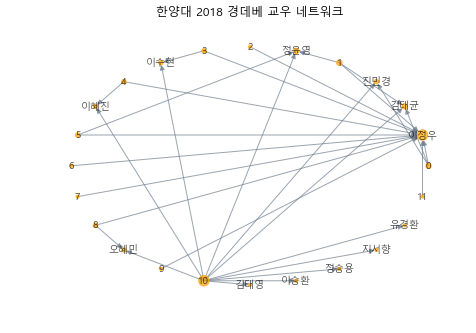

In [27]:
nx.draw_shell(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "orange", # 노드 색상
                     edge_color = "slategray", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True,# 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('first_network.png') # 파일 저장

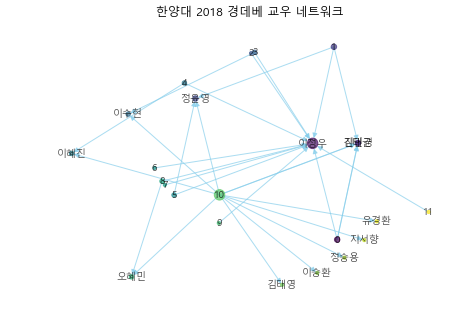

In [28]:
nx.draw_kamada_kawai(G, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     # node_color = "cadetblue", # 노드 색상
                     node_color = range(len(G.nodes)),
                     edge_color = "skyblue", # 엣지 색상
                     # edge_color=colors,
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 4. 데이터 분석

### 연결 정도(양적인 영향력)

In [29]:
nx.degree(G)

DiDegreeView({0: 3, '이정우': 11, '김태균': 3, '진민경': 2, 1: 3, '정윤영': 3, 2: 1, 3: 2, '이수현': 2, 4: 2, '이혜진': 2, 5: 2, 6: 1, 7: 1, 8: 2, '오혜민': 2, 9: 1, 10: 11, '김태영': 1, '이승환': 1, '정승용': 1, '지서향': 1, '유경환': 1, 11: 1})

In [30]:
pd.DataFrame(list(nx.degree(G))).sort_values(by=1, ascending = False).head(10)

,0,1
17,10,11
1,이정우,11
4,1,3
5,정윤영,3
0,0,3
2,김태균,3
3,진민경,2
7,3,2
8,이수현,2
10,이혜진,2


### 연결중심성
- 연결 정도를 비율로 계산(상대적 비교)

In [31]:
nx.degree_centrality(G)

{0: 0.13043478260869565,
 '이정우': 0.4782608695652174,
 '김태균': 0.13043478260869565,
 '진민경': 0.08695652173913043,
 1: 0.13043478260869565,
 '정윤영': 0.13043478260869565,
 2: 0.043478260869565216,
 3: 0.08695652173913043,
 '이수현': 0.08695652173913043,
 4: 0.08695652173913043,
 '이혜진': 0.08695652173913043,
 5: 0.08695652173913043,
 6: 0.043478260869565216,
 7: 0.043478260869565216,
 8: 0.08695652173913043,
 '오혜민': 0.08695652173913043,
 9: 0.043478260869565216,
 10: 0.4782608695652174,
 '김태영': 0.043478260869565216,
 '이승환': 0.043478260869565216,
 '정승용': 0.043478260869565216,
 '지서향': 0.043478260869565216,
 '유경환': 0.043478260869565216,
 11: 0.043478260869565216}

In [32]:
nx.closeness_centrality(G)

{0: 0.0,
 '이정우': 0.4782608695652174,
 '김태균': 0.13043478260869565,
 '진민경': 0.08695652173913043,
 1: 0.0,
 '정윤영': 0.13043478260869565,
 2: 0.0,
 3: 0.0,
 '이수현': 0.08695652173913043,
 4: 0.0,
 '이혜진': 0.08695652173913043,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 '오혜민': 0.08695652173913043,
 9: 0.0,
 10: 0.0,
 '김태영': 0.043478260869565216,
 '이승환': 0.043478260869565216,
 '정승용': 0.043478260869565216,
 '지서향': 0.043478260869565216,
 '유경환': 0.043478260869565216,
 11: 0.0}

In [33]:
nx.betweenness_centrality(G)

{0: 0.0,
 '이정우': 0.0,
 '김태균': 0.0,
 '진민경': 0.0,
 1: 0.0,
 '정윤영': 0.0,
 2: 0.0,
 3: 0.0,
 '이수현': 0.0,
 4: 0.0,
 '이혜진': 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 '오혜민': 0.0,
 9: 0.0,
 10: 0.0,
 '김태영': 0.0,
 '이승환': 0.0,
 '정승용': 0.0,
 '지서향': 0.0,
 '유경환': 0.0,
 11: 0.0}

![삼각관계](triads.jpg)

- 1-003
- 3-102
- 4-021D
- 6-021C

In [34]:
nx.triadic_census(G)

{'003': 1494,
 '012': 400,
 '102': 0,
 '021D': 65,
 '021U': 65,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 0,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 0}

## 5. 분석 결과

In [35]:
print("Number of Nodes : ", nx.number_of_nodes(G))
print("Number of Edges : ", nx.number_of_edges(G))
degreelist = list(pd.DataFrame(list(nx.degree(G))).iloc[:,1])
print("Avg. Node Degree : ", float(sum(degreelist))/nx.number_of_nodes(G))
print("Avg. Path Length : ", nx.average_shortest_path_length(G))

Number of Nodes :  24
Number of Edges :  30
Avg. Node Degree :  2.5
Avg. Path Length :  0.05434782608695652


In [36]:
G.nodes

NodeView((0, '이정우', '김태균', '진민경', 1, '정윤영', 2, 3, '이수현', 4, '이혜진', 5, 6, 7, 8, '오혜민', 9, 10, '김태영', '이승환', '정승용', '지서향', '유경환', 11))

In [40]:
eG = nx.ego_graph(G, "오혜민", radius=1, center=True, undirected=False, distance=None)

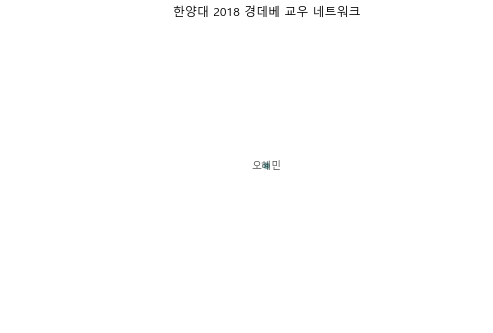

In [41]:
nx.draw_kamada_kawai(eG, node_size = [j * 10 for i, j in nx.degree(G)], # 노드 사이즈
                     node_color = "cadetblue", # 노드 색상
                     edge_color = "skyblue", # 엣지 색상
                     alpha = 0.7, # 노드와 엣지의 투명도
                     with_labels = True, # 노드 이름 표시 여부
                     font_size=10, # 폰트 사이즈
                     font_family='Malgun Gothic', # 한글설정
                     arrowsize = 10) # 화살표 크기
plt.rc('font', family='Malgun Gothic') # 폰트 문제
plt.title('한양대 2018 경데베 교우 네트워크') # 그래프 제목
plt.savefig('second_network.png') # 파일 저장

## 6. 시사점